# INFO623 FINAL PROJECT SPRING 2021/2021

## Mary M Lucas

### Co-Authorship Network Analysis - AI Fairness in Healthcare


Query: "AI AND fairness AND healthcare" OR "AI AND bias AND healthcare" - search in Title, Abstract, or Keywords fields.

Data Source:
- SCOPUS: 147 Results from 2008 to 2023
- Web of Science: 104 results from 2016 to 2023


## PART 2 - ANALYZE COLLABORATIONS BETWEEN AUTHOR-AFFILIATED INSTITUTIONS

In [1]:
import pandas as pd
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from functools import partial
from itertools import combinations
from itertools import islice
from collections import Counter

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('./data/AI_fairness-Scopus.csv')

In [4]:
data.shape

(147, 30)

In [5]:
data.head()

Authors  \
0      Kaur D., Uslu S., Rittichier K.J., Durresi A.   
1        Meng C., Trinh L., Xu N., Enouen J., Liu Y.   
2  Lee L.S., Chan P.K., Wen C., Fung W.C., Cheung...   
3  Jayakumar S., Sounderajah V., Normahani P., Ha...   
4                      Bertl M., Ross P., Draheim D.   

                                        Author(s) ID  \
0   57209112293;57202760194;57232777900;57207529486;   
1  57202426214;57219738459;57208483219;5721219631...   
2  57221462458;55955751100;36731630800;5721720767...   
3  57434674400;56554174700;50661724700;3649668040...   
4               57263110900;15760838900;57200287738;   

                                               Title  Year  \
0      Trustworthy Artificial Intelligence: A Review  2023   
1  Interpretability and fairness evaluation of de...  2022   
2  Artificial intelligence in diagnosis of knee o...  2022   
3  Quality assessment standards in artificial int...  2022   
4  A survey on AI and decision support systems in...  2022   

                       Source title Volume Issue Art. No. Page start Page end  \
0             ACM Computing Surveys     55     2  3491209        NaN      NaN   
1                Scientific Reports     12     1     7166        NaN      NaN   
2                      Arthroplasty      4     1       16        NaN      NaN   
3              npj Digital Medicine      5     1       11        NaN      NaN   
4  Expert Systems with Applications    202   NaN   117464        NaN      NaN   

   ...      ISSN  ISBN  CODEN   PubMed ID Language of Original Document  \
0  ...  03600300   NaN  ACSUE         NaN                       English   
1  ...  20452322   NaN    NaN  35504931.0                       English   
2  ...  25247948   NaN    NaN         NaN                       English   
3  ...  23986352   NaN    NaN         NaN                       English   
4  ...  09574174   NaN  ESAPE         NaN                       English   

  Document Type Publication Stage                   Open Access  Source  \
0        Review             Final                           NaN  Scopus   
1       Article             Final  All Open Access, Gold, Green  Scopus   
2        Review             Final  All Open Access, Gold, Green  Scopus   
3       Article             Final  All Open Access, Gold, Green  Scopus   
4       Article             Final                           NaN  Scopus   

                  EID  
0  2-s2.0-85128190943  
1  2-s2.0-85129293939  
2  2-s2.0-85126121501  
3  2-s2.0-85123842924  
4  2-s2.0-85129720283  

[5 rows x 30 columns]

In [6]:
data.isnull().sum(axis = 0)

Authors                            0
Author(s) ID                       0
Title                              0
Year                               0
Source title                       0
Volume                            40
Issue                             77
Art. No.                          99
Page start                        60
Page end                          62
Page count                       144
Cited by                          51
DOI                                8
Link                               0
Affiliations                       3
Authors with affiliations          3
Author Keywords                   33
Funding Details                  101
References                        10
Publisher                          1
ISSN                              30
ISBN                             103
CODEN                            108
PubMed ID                         90
Language of Original Document      0
Document Type                      0
Publication Stage                  0
O

In [7]:
# remove the entries missing affiliations
data = data[data['Affiliations'].notna()]
data.shape

(144, 30)

In [8]:
pairs = data[['Title', 'Affiliations']]
pairs

Title  \
0        Trustworthy Artificial Intelligence: A Review   
1    Interpretability and fairness evaluation of de...   
2    Artificial intelligence in diagnosis of knee o...   
3    Quality assessment standards in artificial int...   
4    A survey on AI and decision support systems in...   
..                                                 ...   
142  The Adherence's indicators of cancer patients ...   
143  What Needs to Be Done to Ensure the Ethical Us...   
144  A study on relevance of professional training ...   
145  Clinicians' Implicit and explicit attitudes ab...   
146  Impact of general health status on validity of...   

                                          Affiliations  
0    Indiana University-Purdue University Indianapo...  
1    Department of Computer Science, University of ...  
2    Department of Orthopaedics and Traumatology, T...  
3    Department of Surgery and Cancer, Imperial Col...  
4    Department of Health Technologies, Tallinn Uni...  
..                                                 ...  
142  Corso di Laurea magistrale scienze infermieris...  
143  ICREA, Institut de Biologia Evolutiva (UPF-CSI...  
144  Symbiosis Institute of Business Management, Be...  
145  Department of Biomedical Informatics and Medic...  
146  Lions Vision Research and Rehabilitation Cente...  

[144 rows x 2 columns]

In [9]:
#create mapping between authors and IDs if needed
def cmp(x, y):
    mapping = dict(zip(x, y))
    return mapping

In [10]:
# create author author pairs for each paper
paired = (data.set_index('Title')['Affiliations']
   .str.split(';')
   .map(partial(combinations, r=2))
   .map(list)
   .explode()
   .reset_index())

In [11]:
paired

Title  \
0         Trustworthy Artificial Intelligence: A Review   
1     Interpretability and fairness evaluation of de...   
2     Artificial intelligence in diagnosis of knee o...   
3     Artificial intelligence in diagnosis of knee o...   
4     Artificial intelligence in diagnosis of knee o...   
...                                                 ...   
1482  Clinicians' Implicit and explicit attitudes ab...   
1483  Clinicians' Implicit and explicit attitudes ab...   
1484  Clinicians' Implicit and explicit attitudes ab...   
1485  Clinicians' Implicit and explicit attitudes ab...   
1486  Impact of general health status on validity of...   

                                           Affiliations  
0                                                   NaN  
1                                                   NaN  
2     (Department of Orthopaedics and Traumatology, ...  
3     (Department of Orthopaedics and Traumatology, ...  
4     (Department of Orthopaedics and Traumatology, ...  
...                                                 ...  
1482  (Department of Biomedical Informatics and Medi...  
1483  ( Centers for American Indian and Alaska Nativ...  
1484  ( Centers for American Indian and Alaska Nativ...  
1485  ( Center for Clinical and Epidemiological Rese...  
1486  (Lions Vision Research and Rehabilitation Cent...  

[1487 rows x 2 columns]

In [12]:
# how many times does each pairing appear
paired.groupby('Affiliations').size().sort_values(ascending=False)

Affiliations
( Centre for Regulatory Science and Innovation, Birmingham Health Partners, Birmingham, United Kingdom,  Health Data Research UK, London, United Kingdom)                                                                                              2
( Centre for Regulatory Science and Innovation, Birmingham Health Partners, Birmingham, United Kingdom,  Centre for Patient Reported Outcomes Research, Institute of Applied Health Research, University of Birmingham, Birmingham, United Kingdom)    2
( Health Data Research UK, London, United Kingdom,  Centre for Patient Reported Outcomes Research, Institute of Applied Health Research, University of Birmingham, Birmingham, United Kingdom)                                                         2
(Fiddler Labs,  LinkedIn)                                                                                                                                                                                                                       

In [13]:
# create a dataframe, will use the count as edge weights
df = paired.groupby('Affiliations').size().to_frame(name = 'count').reset_index()

In [14]:
# split the pairs of authors into two columns
new_col_list = ['aff_0','aff_1']
for n,col in enumerate(new_col_list):
    df[col] = df['Affiliations'].apply(lambda location: location[n])

In [15]:
df.sort_values('count',ascending=False)

Affiliations  count  \
113   ( Centre for Regulatory Science and Innovation...      2   
111   ( Centre for Regulatory Science and Innovation...      2   
514   ( Health Data Research UK, London, United King...      2   
1245                          (Fiddler Labs,  LinkedIn)      2   
970   ( University Hospitals Birmingham NHS Foundati...      1   
...                                                 ...    ...   
480   ( Flinders University, Adelaide, Australia,  D...      1   
479   ( Flinders University, Adelaide, Australia,  C...      1   
478   ( Faculty of Pharmacy, University of Sarajevo,...      1   
477   ( Faculty of Pharmacy, University of Sarajevo,...      1   
1442  (Warren Alpert Medical School of Brown Univers...      1   

                                                  aff_0  \
113    Centre for Regulatory Science and Innovation,...   
111    Centre for Regulatory Science and Innovation,...   
514     Health Data Research UK, London, United Kingdom   
1245                                       Fiddler Labs   
970    University Hospitals Birmingham NHS Foundatio...   
...                                                 ...   
480            Flinders University, Adelaide, Australia   
479            Flinders University, Adelaide, Australia   
478    Faculty of Pharmacy, University of Sarajevo, ...   
477    Faculty of Pharmacy, University of Sarajevo, ...   
1442  Warren Alpert Medical School of Brown Universi...   

                                                  aff_1  
113     Health Data Research UK, London, United Kingdom  
111    Centre for Patient Reported Outcomes Research...  
514    Centre for Patient Reported Outcomes Research...  
1245                                           LinkedIn  
970    Moorfields Eye Hospital NHS Foundation Trust,...  
...                                                 ...  
480    Department of Trauma Surgery, University Medi...  
479    Center for Medical Image Science and Visualiz...  
478    International Burch University, Sarajevo, Bos...  
477    Institute for Biomedical Diagnostics and Rese...  
1442   The Harvard Kennedy School of Government, Har...  

[1443 rows x 4 columns]

### Network creation and analysis

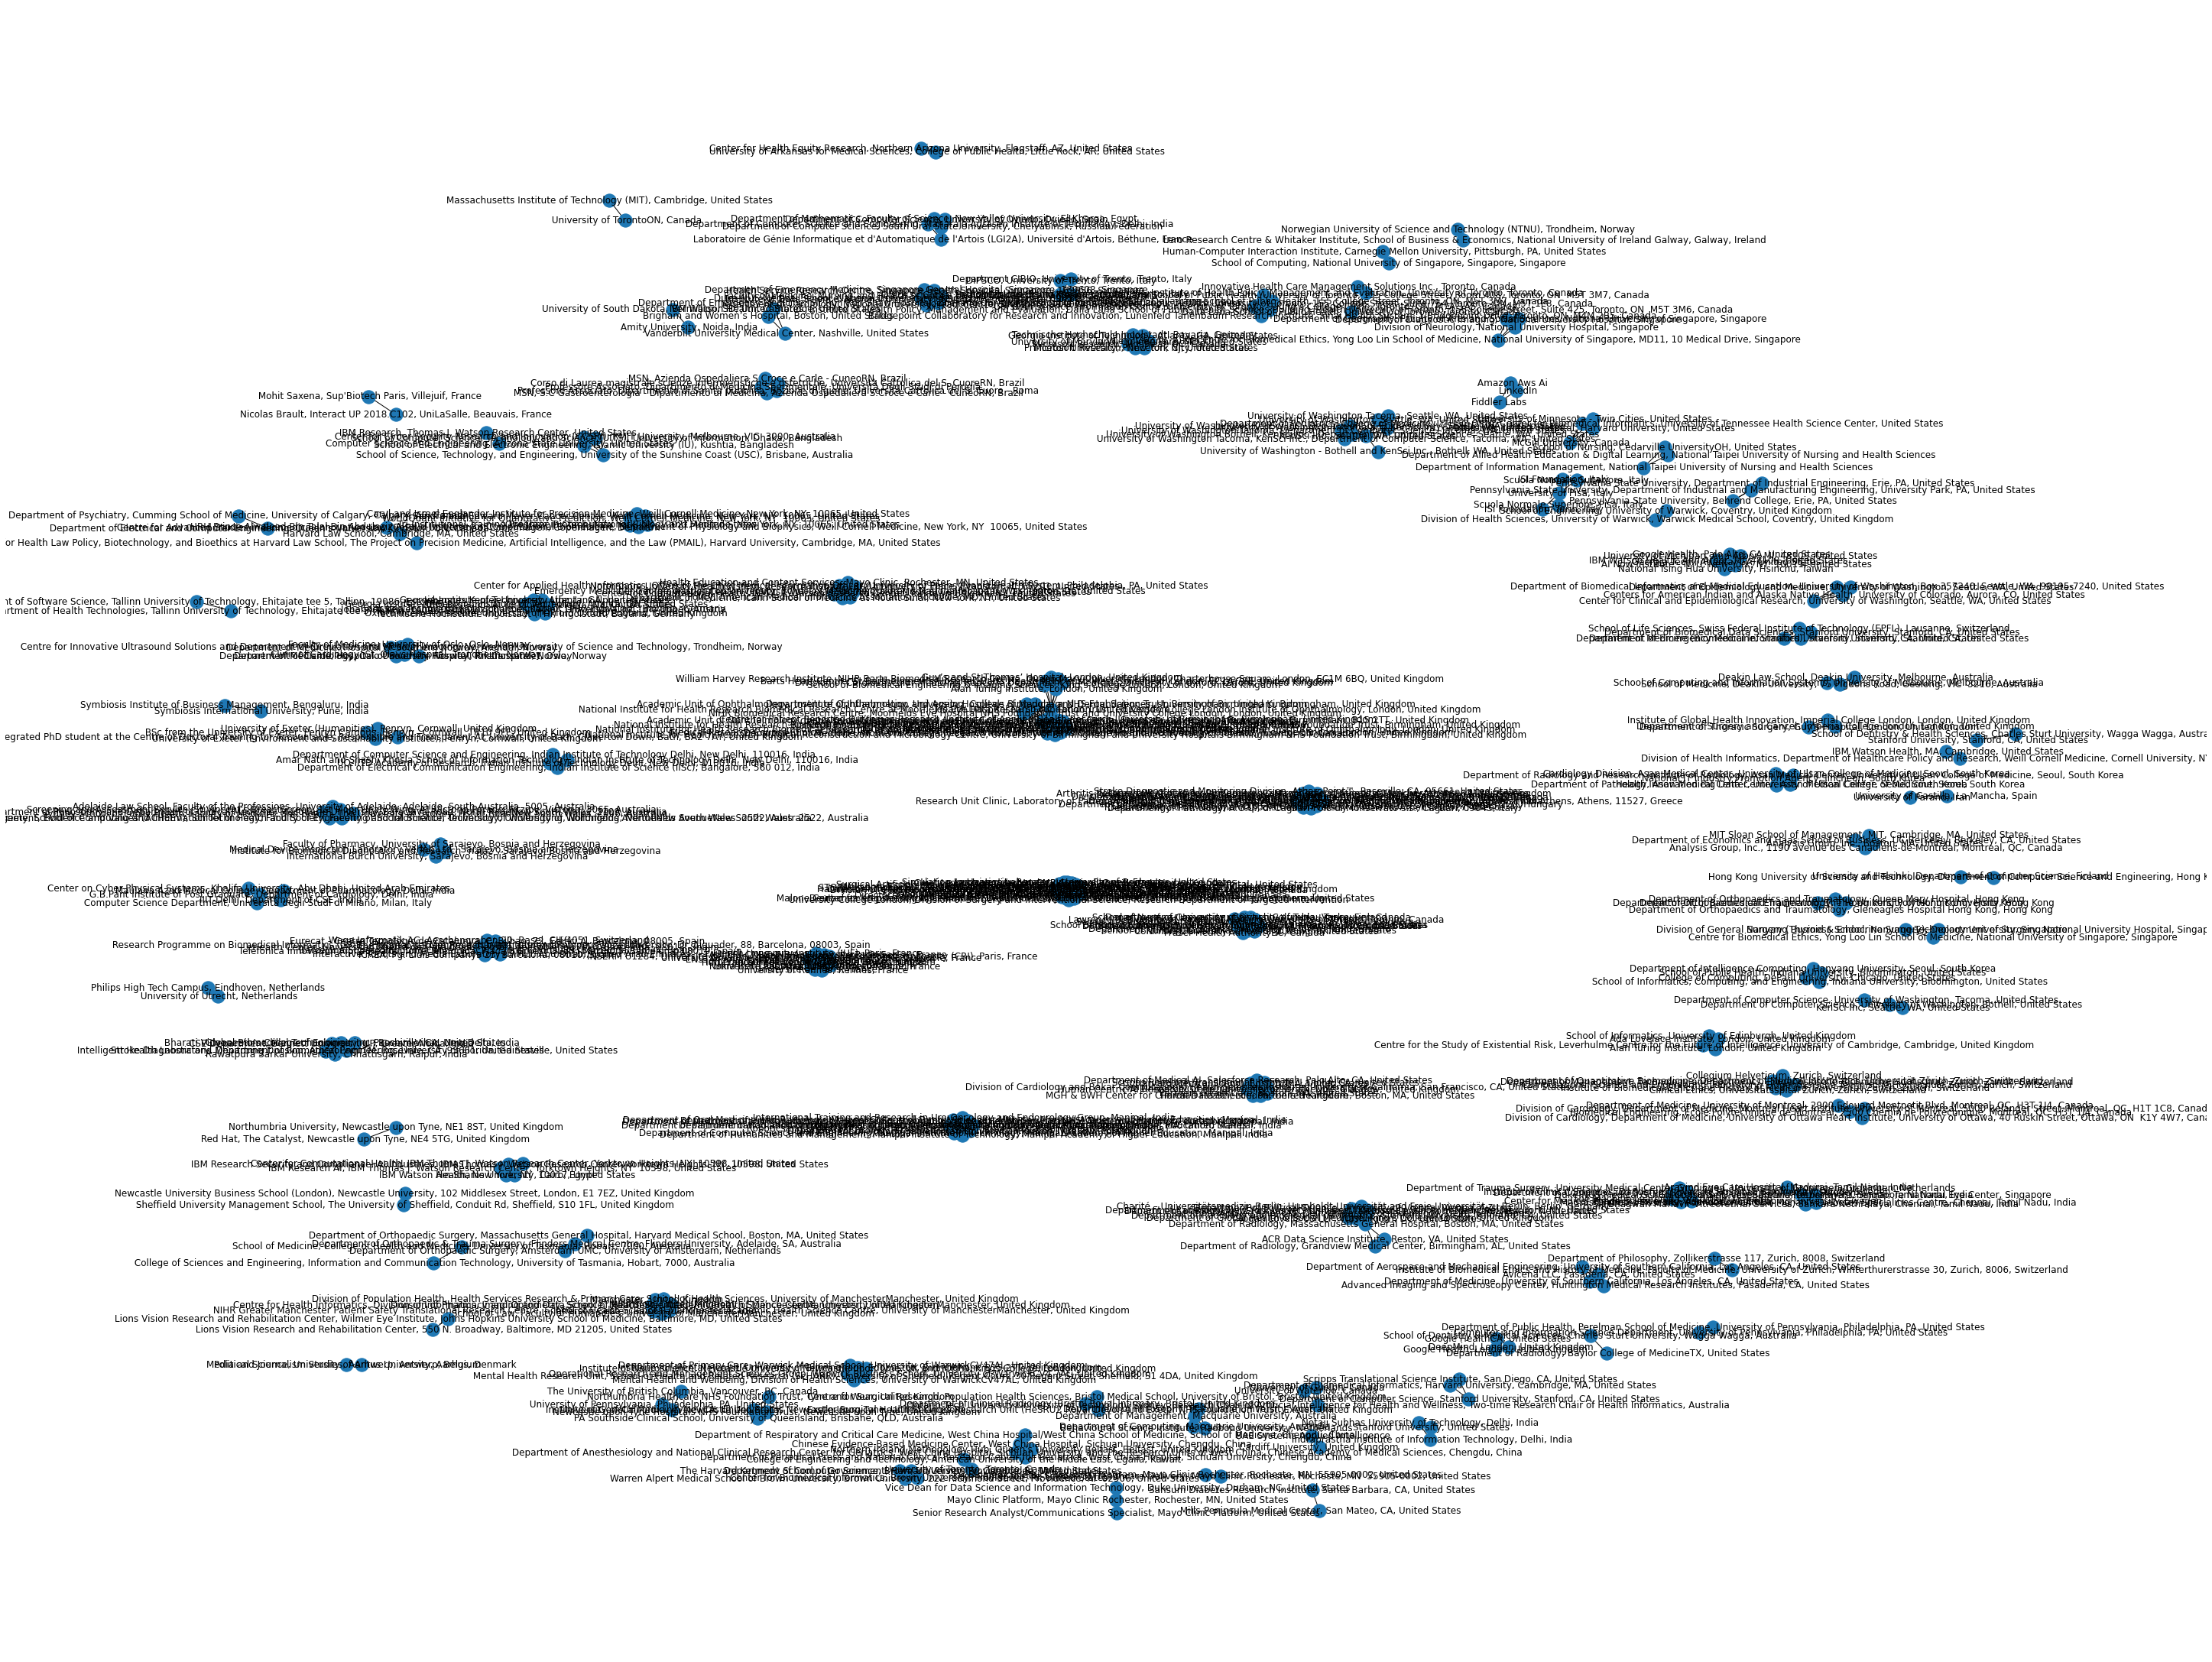

In [16]:
# create graph
plt.figure(figsize = (40, 30))

G = nx.from_pandas_edgelist(df, 'aff_0', 'aff_1', edge_attr=True)
nx.draw(G, with_labels=True)

In [17]:
df.shape
df_scopus1 = df[['aff_0', 'aff_1', 'count']]
df_scopus1.to_csv('scopus_2_main.csv')


In [18]:
print('Number of components in {}: {}'.format(G, nx.number_connected_components(G)))

Number of components in Graph with 458 nodes and 1443 edges: 97


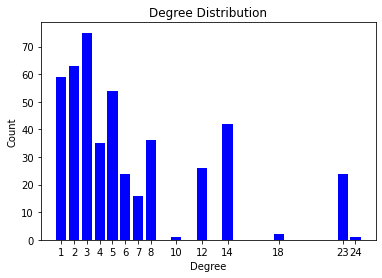

In [19]:
# degree distribution
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)
degreeCount = Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())
plt.bar(deg, cnt, width=0.80, color='b')
plt.title("Degree Distribution")
plt.ylabel("Count")
plt.xticks(deg)
plt.xlabel("Degree")
plt.show()

In [20]:
# network density
nx.density(G)

0.013788424603212522

In [21]:
nx.average_degree_connectivity(G)

{2: 2.1904761904761907,
 10: 6.8,
 5: 5.0,
 3: 3.066666666666667,
 4: 4.057142857142857,
 6: 7.916666666666667,
 23: 23.0,
 14: 14.36734693877551,
 24: 11.0,
 7: 7.0,
 8: 7.923611111111111,
 18: 13.0,
 12: 12.0,
 1: 1.11864406779661}

In [22]:
# have node size depend on node degree
dict(G.degree()).values()

dict_values([2, 10, 5, 5, 5, 3, 3, 3, 5, 5, 4, 4, 4, 6, 6, 3, 3, 23, 23, 23, 23, 23, 4, 4, 4, 4, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 3, 3, 3, 6, 24, 3, 3, 3, 5, 5, 5, 5, 3, 3, 3, 3, 3, 5, 5, 5, 23, 23, 23, 23, 23, 23, 4, 4, 4, 4, 7, 7, 7, 7, 7, 7, 7, 5, 5, 5, 5, 5, 8, 8, 8, 8, 3, 3, 3, 3, 8, 8, 8, 8, 3, 3, 3, 3, 2, 2, 5, 5, 5, 5, 14, 14, 14, 14, 14, 14, 14, 14, 18, 14, 6, 5, 5, 18, 14, 6, 8, 8, 8, 8, 8, 8, 8, 4, 4, 4, 5, 5, 5, 3, 3, 3, 5, 5, 12, 12, 12, 12, 12, 12, 12, 12, 3, 3, 3, 2, 2, 2, 2, 3, 3, 3, 14, 14, 14, 3, 3, 3, 6, 6, 6, 2, 2, 3, 3, 4, 4, 12, 12, 12, 12, 12, 12, 2, 2, 4, 2, 2, 5, 5, 5, 5, 5, 12, 12, 12, 12, 3, 6, 6, 3, 3, 3, 3, 12, 12, 12, 12, 2, 2, 8, 8, 8, 8, 8, 8, 8, 8, 3, 6, 2, 2, 4, 5, 23, 23, 23, 23, 23, 23, 23, 12, 5, 3, 7, 7, 7, 7, 7, 7, 6, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 8, 8, 8, 8, 5, 3, 3, 3, 6, 6, 4, 5, 2, 4, 2, 14, 14, 14, 2, 2, 2, 2, 14, 5, 5, 5, 5, 5, 3, 3, 3, 2, 2, 12, 8, 3, 4, 4, 4, 2, 2, 4, 4, 4, 4, 23, 2, 2, 2, 2, 6, 6, 6, 6, 6, 7, 2, 2, 5,

In [23]:
#have edge thickness depend on count of collaborations
edgelist = nx.to_edgelist(G)

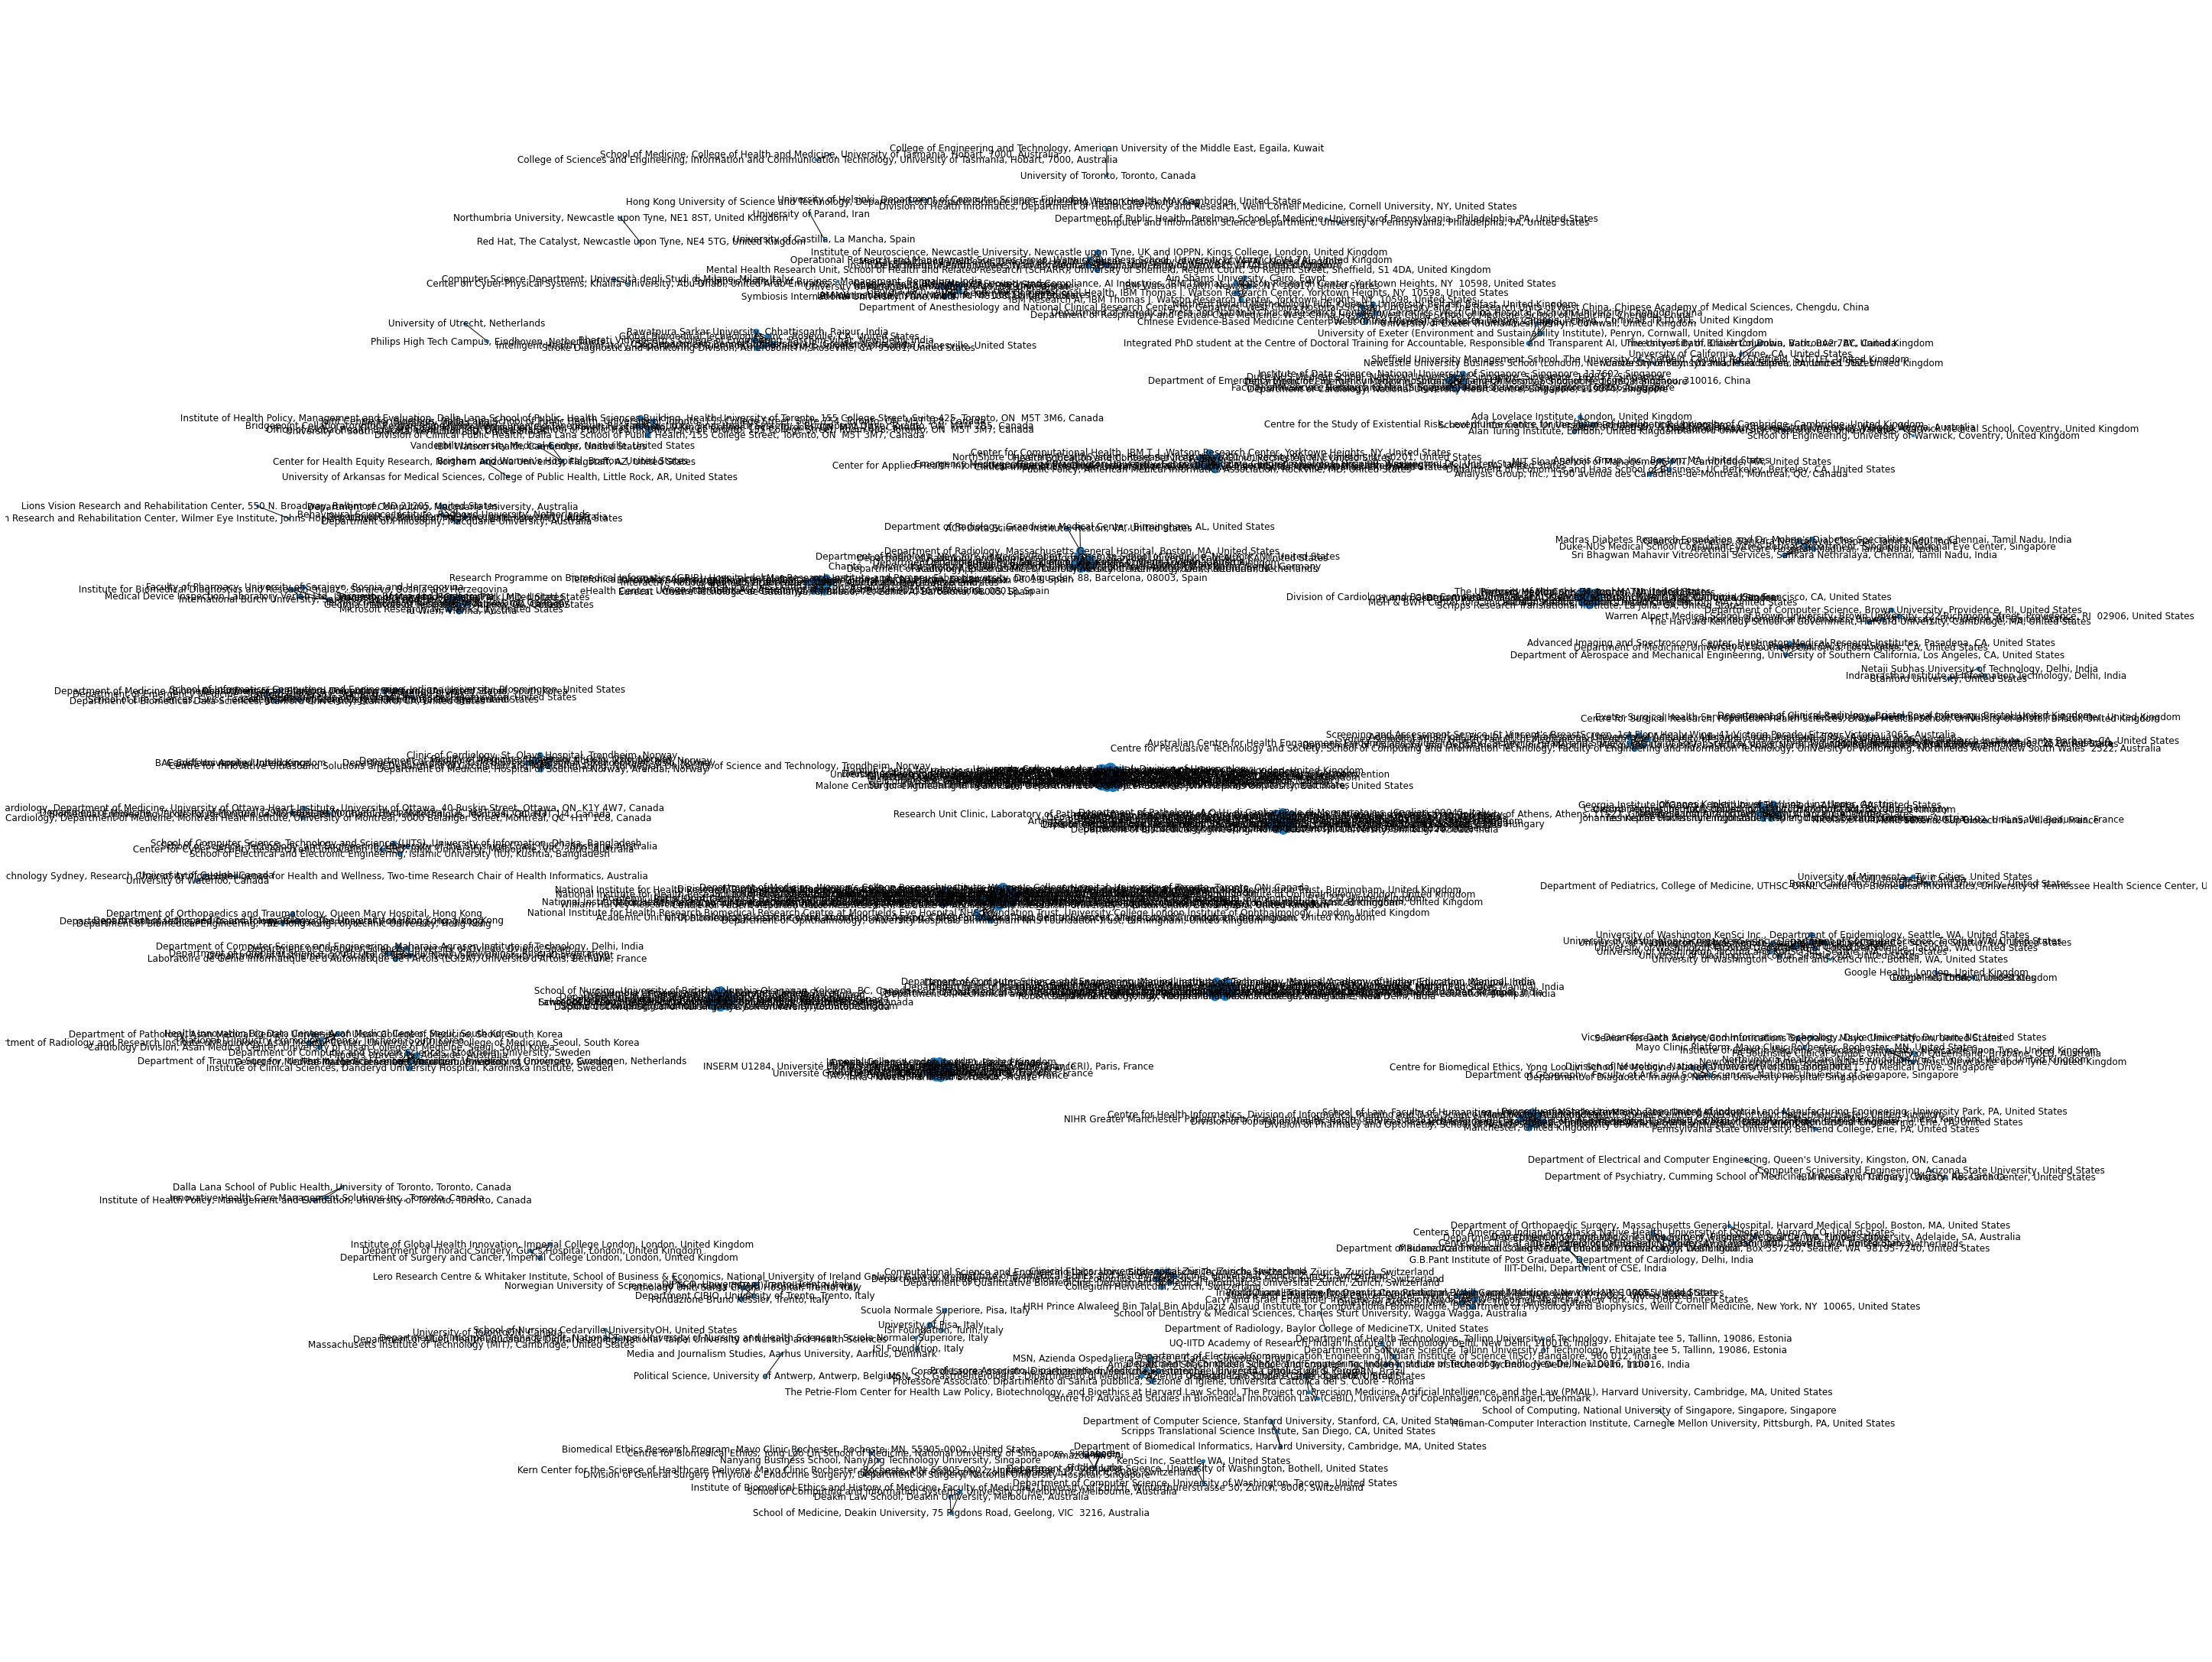

In [24]:
# recreate graph with attributes added
plt.figure(figsize = (40, 30))

G = nx.from_pandas_edgelist(df, 'aff_0', 'aff_1', edge_attr=True)
nx.draw(G, 
        with_labels=True, 
        node_size = [d*10 for d in dict(G.degree()).values()],
       width = [v[2]['count'] for v in edgelist])

In [25]:
# export graph for import to Gephi
G = nx.from_pandas_edgelist(df, 'aff_0', 'aff_1')
nx.write_gexf(G, 'scopus2_main.gexf', encoding='utf-8', prettyprint=True, version='1.2draft')

In [63]:
# Gephi graph


### Centrality and other measures

In [27]:
#function to return first n items of dict as a list
def take(n, iterable):
    return list(islice(iterable, n))


In [28]:
# degree centrality
dc_sorted_tuples = sorted(nx.degree_centrality(G).items(), key=lambda item: item[1], reverse=True)
dc_sorted_dict = {k: v for k, v in dc_sorted_tuples}

# show top 5
take(5, dc_sorted_dict.items())

[(' Health Data Research UK, London, United Kingdom', 0.0525164113785558),
 (' Applied Research, Intuitive Surgical, Inc., Sunnyvale, CA, United States',
  0.05032822757111597),
 (' BARCO NV – Healthcare division, Kortrijk, Belgium', 0.05032822757111597),
 (' C-SATS Inc., a Johnson & Johnson Medical Devices CompanyCA, United States',
  0.05032822757111597),
 (' Johnson and Johnson Medical DevicesCA, United States',
  0.05032822757111597)]

In [29]:
# closeness centrality
cc_sorted_tuples = sorted(nx.closeness_centrality(G).items(), key=lambda item: item[1], reverse=True)
cc_sorted_dict = {k: v for k, v in cc_sorted_tuples}

# show top 5
take(5, cc_sorted_dict.items())

[(' Health Data Research UK, London, United Kingdom', 0.0525164113785558),
 (' Applied Research, Intuitive Surgical, Inc., Sunnyvale, CA, United States',
  0.05032822757111598),
 (' BARCO NV – Healthcare division, Kortrijk, Belgium', 0.05032822757111598),
 (' C-SATS Inc., a Johnson & Johnson Medical Devices CompanyCA, United States',
  0.05032822757111598),
 (' Johnson and Johnson Medical DevicesCA, United States',
  0.05032822757111598)]

In [30]:
# betweenness centrality
bc_sorted_tuples = sorted(nx.betweenness_centrality(G).items(), key=lambda item: item[1], reverse=True)
bc_sorted_dict = {k: v for k, v in bc_sorted_tuples}

# show top 5
take(5, bc_sorted_dict.items())

[(' Health Data Research UK, London, United Kingdom', 0.001190064877730431),
 (' KenSci Inc., Seattle, WA, United States', 0.00018234865061998541),
 (' Department of Radiology, Massachusetts General Hospital, Boston, MA, United States',
  0.00015355675841682983),
 (' Centre for Patient Reported Outcomes Research, Institute of Applied Health Research, University of Birmingham, Birmingham, United Kingdom',
  0.0001535567584168298),
 (' Centre for Regulatory Science and Innovation, Birmingham Health Partners, Birmingham, United Kingdom',
  0.0001535567584168298)]

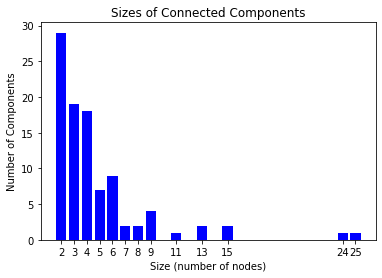

In [31]:
size_sequence = sorted([len(c) for c in sorted(nx.connected_components(G), key=len, reverse=True)])
sizeCount = Counter(size_sequence)
deg, cnt = zip(*sizeCount.items())
plt.bar(deg, cnt, color='b')
plt.title("Sizes of Connected Components")
plt.ylabel("Number of Components")
plt.xticks(deg)
plt.xlabel("Size (number of nodes)")
plt.show()


In [32]:
largest_cc = max(nx.connected_components(G), key=len)

In [33]:
largest_cc

{' Alan Turing Institute, London, United Kingdom',
 ' Barts Heart Centre, St Bartholomew’s Hospital, Barts Health NHS Trust, West Smithfield, London, EC1A 7BE, United Kingdom',
 ' Centre for Journalology, Clinical Epidemiology Program, Ottawa Hospital Research Institute, Ottawa, Canada',
 ' Centre for Patient Reported Outcomes Research, Institute of Applied Health Research, University of Birmingham, Birmingham, United Kingdom',
 ' Centre for Regulatory Science and Innovation, Birmingham Health Partners, Birmingham, United Kingdom',
 ' Department of Medicine, Women’s College Research Institute, Women’s College Hospital, University of Toronto, Toronto, ON, Canada',
 ' Department of Ophthalmology, University Hospitals Birmingham NHS Foundation Trust, Birmingham, United Kingdom',
 ' Division of Cardiovascular Medicine, Radcliffe Department of Medicine, University of Oxford, Oxford, United Kingdom',
 ' Guy’s and St Thomas’ Hospital, London, United Kingdom',
 ' Health Data Research UK, Londo

In [34]:
cluster_coeffs = nx.clustering(G, nodes=None, weight='count')

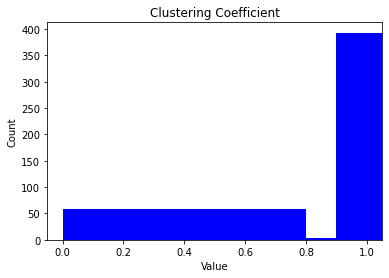

In [35]:
plt.hist(cluster_coeffs.values(), width=0.80, color='b')
plt.title("Clustering Coefficient")
plt.ylabel("Count")
plt.xlabel("Value")
plt.show()

In [36]:
pagerank = nx.pagerank(G, alpha=0.85, weight='count')

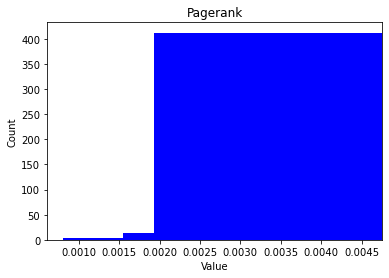

In [37]:
plt.hist(pagerank.values(),  width=0.80, color='b')
plt.title("Pagerank")
plt.ylabel("Count")
plt.xlabel("Value")
plt.show()

### Cliques

In [38]:
def find_cliques_size_k(G, k):
    all_cliques = set()
    for clique in nx.find_cliques(G):
        if len(clique) == k:
            all_cliques.add(tuple(sorted(clique)))
        elif len(clique) > k:
            for mini_clique in combinations(clique, k):
                all_cliques.add(tuple(sorted(mini_clique)))
    return len(all_cliques)

for k in [1, 2, 3, 4]:
    print(find_cliques_size_k(G, k))

458
1443
4896
17124


In [39]:
# clique counts per actor
cliques_count = nx.number_of_cliques(G)

cl_sorted_tuples = sorted(cliques_count.items(), key=lambda item: item[1], reverse=True)
cl_sorted_dict = {k: v for k, v in cl_sorted_tuples}

# show top 
take(10, cl_sorted_dict.items())

[(' Health Data Research UK, London, United Kingdom', 3),
 (' KenSci Inc., Seattle, WA, United States', 3),
 (' Department of Radiology, Massachusetts General Hospital, Boston, MA, United States',
  2),
 (' Centre for Patient Reported Outcomes Research, Institute of Applied Health Research, University of Birmingham, Birmingham, United Kingdom',
  2),
 (' Centre for Regulatory Science and Innovation, Birmingham Health Partners, Birmingham, United Kingdom',
  2),
 (' University of Pisa, Italy', 2),
 (' ACR Data Science Institute, Reston, VA, United States', 1),
 (' AI Now Institute - NYU, New York, NY  10011, United States', 1),
 (' Georgia Tech., Atlanta, GA, United States', 1),
 (' Google Health, Palo Alto, CA, United States', 1)]

In [40]:
nx.cliques_containing_node(G, nodes=' Health Data Research UK, London, United Kingdom')

[[' Health Data Research UK, London, United Kingdom',
  ' Barts Heart Centre, St Bartholomew’s Hospital, Barts Health NHS Trust, West Smithfield, London, EC1A 7BE, United Kingdom',
  ' Division of Cardiovascular Medicine, Radcliffe Department of Medicine, University of Oxford, Oxford, United Kingdom',
  ' Alan Turing Institute, London, United Kingdom',
  ' William Harvey Research Institute, NIHR Barts Biomedical Research Centre, Queen Mary University London, Charterhouse Square, London, EC1M 6BQ, United Kingdom',
  ' Guy’s and St Thomas’ Hospital, London, United Kingdom',
  'School of Biomedical Engineering & Imaging Sciences, King’s College London, London, United Kingdom'],
 [' Health Data Research UK, London, United Kingdom',
  ' Centre for Patient Reported Outcomes Research, Institute of Applied Health Research, University of Birmingham, Birmingham, United Kingdom',
  ' Centre for Regulatory Science and Innovation, Birmingham Health Partners, Birmingham, United Kingdom',
  ' Nationa

In [41]:
nx.cliques_containing_node(G, nodes=' KenSci Inc., Seattle, WA, United States')

[[' University of Washington Tacoma, KenSci Inc., Department of Computer Science, Tacoma, WA, United States',
  'University of Washington Bothell, KenSci Inc., Department of Computer Science, Seattle, WA, United States',
  ' University of Washington KenSci Inc., Department of Epidemiology, Seattle, WA, United States',
  ' University of Washington Tacoma, Department of Computer Science, Tacoma, WA, United States',
  ' KenSci Inc., Seattle, WA, United States'],
 [' KenSci Inc., Seattle, WA, United States',
  ' University of Washington Tacoma and KenSci Inc, Seattle, WA, United States',
  ' University of Washington, Seattle, WA, United States',
  'University of Washington Tacoma, Seattle, WA, United States'],
 [' KenSci Inc., Seattle, WA, United States',
  'University of Washington - Bothell and KenSci Inc., Bothell, WA, United States']]

In [42]:
Health_Data_Research_UK_cliques = G.subgraph([' Health Data Research UK, London, United Kingdom',
  ' Centre for Regulatory Science and Innovation, Birmingham Health Partners, Birmingham, United Kingdom',
  ' Centre for Patient Reported Outcomes Research, Institute of Applied Health Research, University of Birmingham, Birmingham, United Kingdom',
  ' Department of Ophthalmology, University Hospitals Birmingham NHS Foundation Trust, Birmingham, United Kingdom',
  'Academic Unit of Ophthalmology, Institute of Inflammation and Ageing, College of Medical and Dental Sciences, University of Birmingham, Birmingham, United Kingdom',
  ' National Institute for Health Research Biomedical Research Centre at Moorfields Eye Hospital NHS Foundation Trust, University College London Institute of Ophthalmology, London, United Kingdom',
  ' NIHR Biomedical Research Centre, Moorfields Eye Hospital NHS Foundation Trust and University College London, London, United Kingdom',
 ' Health Data Research UK, London, United Kingdom',
  ' Centre for Regulatory Science and Innovation, Birmingham Health Partners, Birmingham, United Kingdom',
  ' Centre for Patient Reported Outcomes Research, Institute of Applied Health Research, University of Birmingham, Birmingham, United Kingdom',
  'Academic Unit of Ophthalmology, Institute of Inflammation and Ageing, College of Medical and Dental Sciences, University of Birmingham, Birmingham, B15 2TT, United Kingdom',
  ' Institute of Applied Health Research, University of Birmingham, Birmingham, United Kingdom',
  ' National Institute for Health Research Surgical Reconstruction and Microbiology Centre, University of Birmingham and University Hospitals Birmingham NHS Foundation Trust, Birmingham, United Kingdom',
  ' Department of Medicine, Women’s College Research Institute, Women’s College Hospital, University of Toronto, Toronto, ON, Canada',
  ' School of Epidemiology and Public Health, Faculty of Medicine, University of Ottawa, Ottawa, Canada',
  ' National Institute for Health Research Applied Research Collaborative West Midlands, Coventry, United Kingdom',
  ' Moorfields Eye Hospital NHS Foundation Trust, London, United Kingdom',
  ' Centre for Journalology, Clinical Epidemiology Program, Ottawa Hospital Research Institute, Ottawa, Canada',
  ' University Hospitals Birmingham NHS Foundation Trust, Birmingham, United Kingdom',
  ' National Institute for Health Research Biomedical Research Centre at Moorfields Eye Hospital NHS Foundation Trust and University College London Institute of Ophthalmology, London, United Kingdom',
  ' National Institute for Health Research Birmingham Biomedical Research Centre, University of Birmingham and University Hospitals Birmingham NHS Foundation Trust, Birmingham, United Kingdom',
  ' Medical Research Council Clinical Trials Unit at University College London, Institute of Clinical Trials and Methodology, University College London, London, United Kingdom',
 ' Health Data Research UK, London, United Kingdom',
  'School of Biomedical Engineering & Imaging Sciences, King’s College London, London, United Kingdom',
  ' Division of Cardiovascular Medicine, Radcliffe Department of Medicine, University of Oxford, Oxford, United Kingdom',
  ' Alan Turing Institute, London, United Kingdom',
  ' William Harvey Research Institute, NIHR Barts Biomedical Research Centre, Queen Mary University London, Charterhouse Square, London, EC1M 6BQ, United Kingdom',
  ' Barts Heart Centre, St Bartholomew’s Hospital, Barts Health NHS Trust, West Smithfield, London, EC1A 7BE, United Kingdom',
  ' Guy’s and St Thomas’ Hospital, London, United Kingdom'])

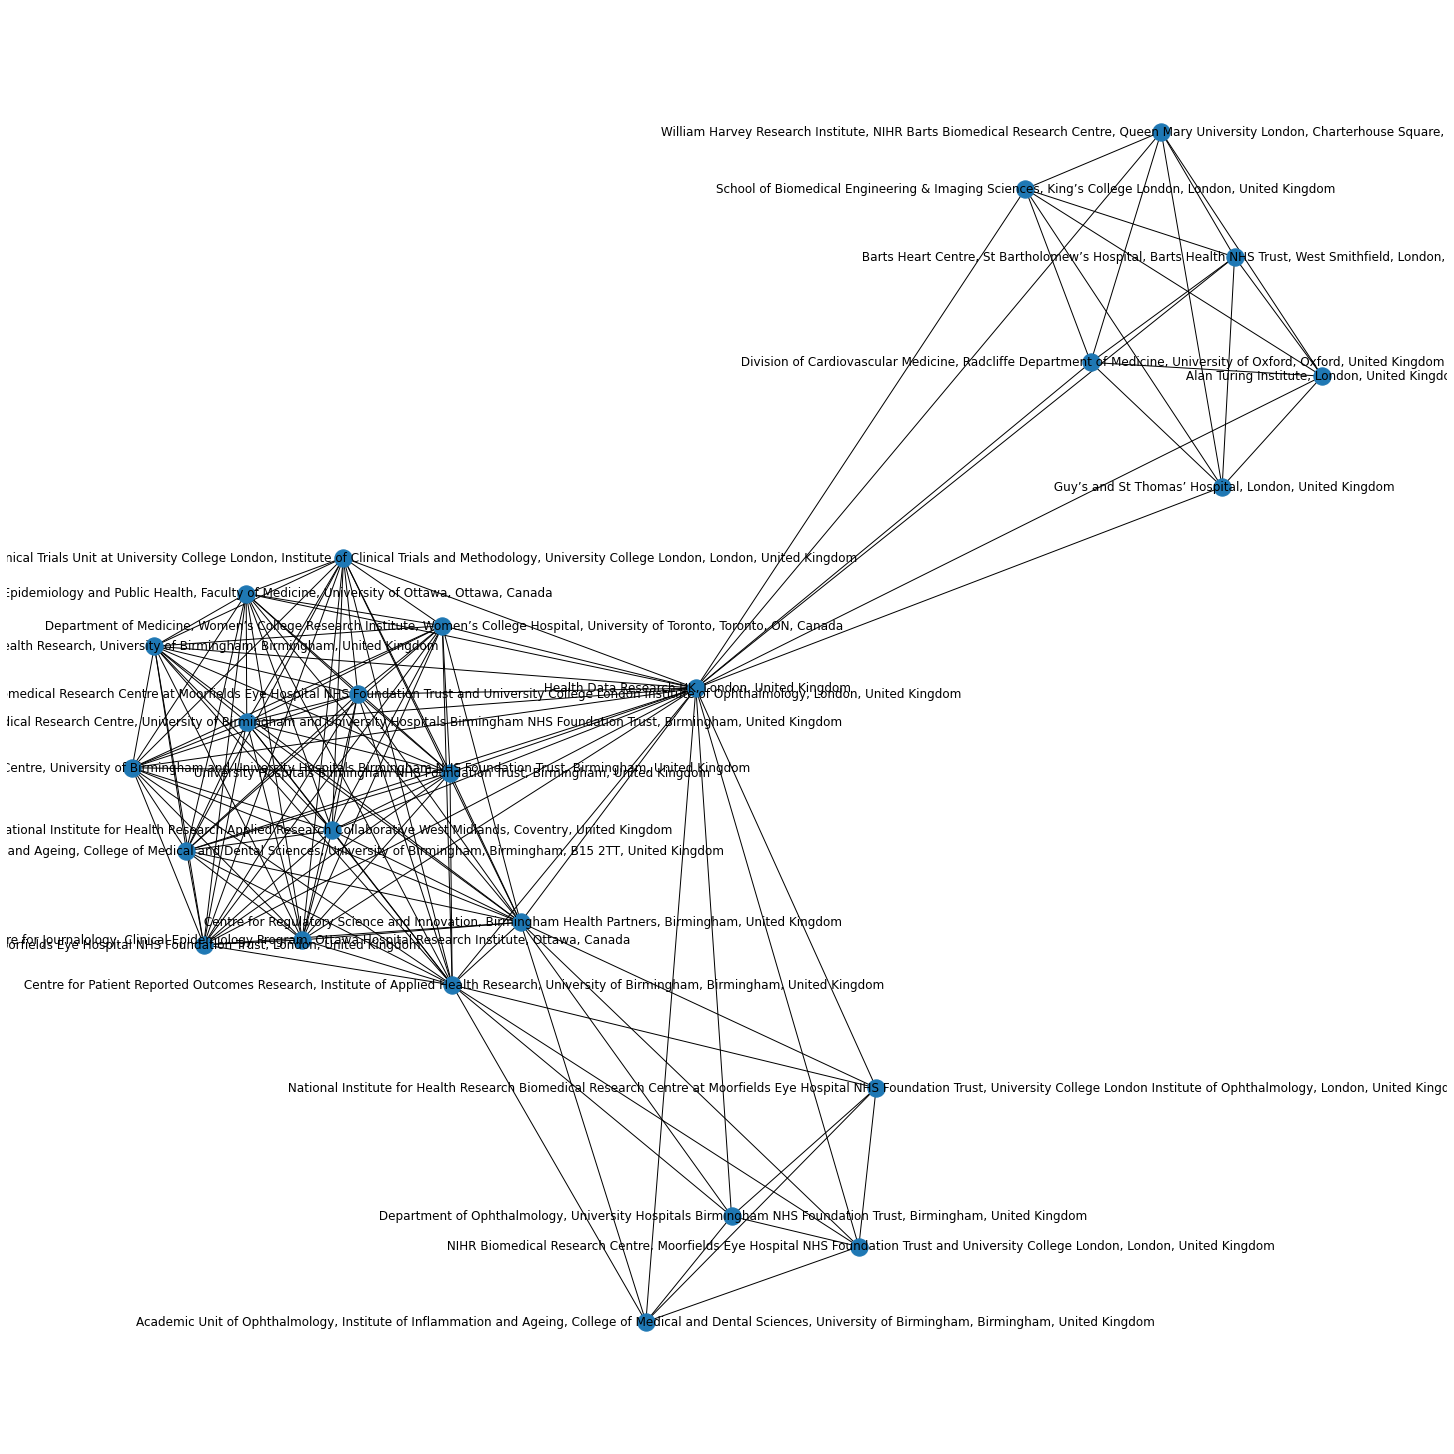

In [43]:
plt.figure(figsize = (20, 20))
nx.draw(Health_Data_Research_UK_cliques, with_labels=True)

In [44]:
# export graph for import to Gephi
nx.write_gexf(Health_Data_Research_UK_cliques, 'scopus2_cliques_1.gexf', encoding='utf-8', prettyprint=True, version='1.2draft')

In [45]:
KenSci_Inc_Seattle_cliques = G.subgraph([' University of Washington Tacoma, Department of Computer Science, Tacoma, WA, United States',
  ' University of Washington KenSci Inc., Department of Epidemiology, Seattle, WA, United States',
  ' University of Washington Tacoma, KenSci Inc., Department of Computer Science, Tacoma, WA, United States',
  'University of Washington Bothell, KenSci Inc., Department of Computer Science, Seattle, WA, United States',
  ' KenSci Inc., Seattle, WA, United States',
 'University of Washington - Bothell and KenSci Inc., Bothell, WA, United States',
  ' KenSci Inc., Seattle, WA, United States',
 ' KenSci Inc., Seattle, WA, United States',
  'University of Washington Tacoma, Seattle, WA, United States',
  ' University of Washington Tacoma and KenSci Inc, Seattle, WA, United States',
  ' University of Washington, Seattle, WA, United States'])

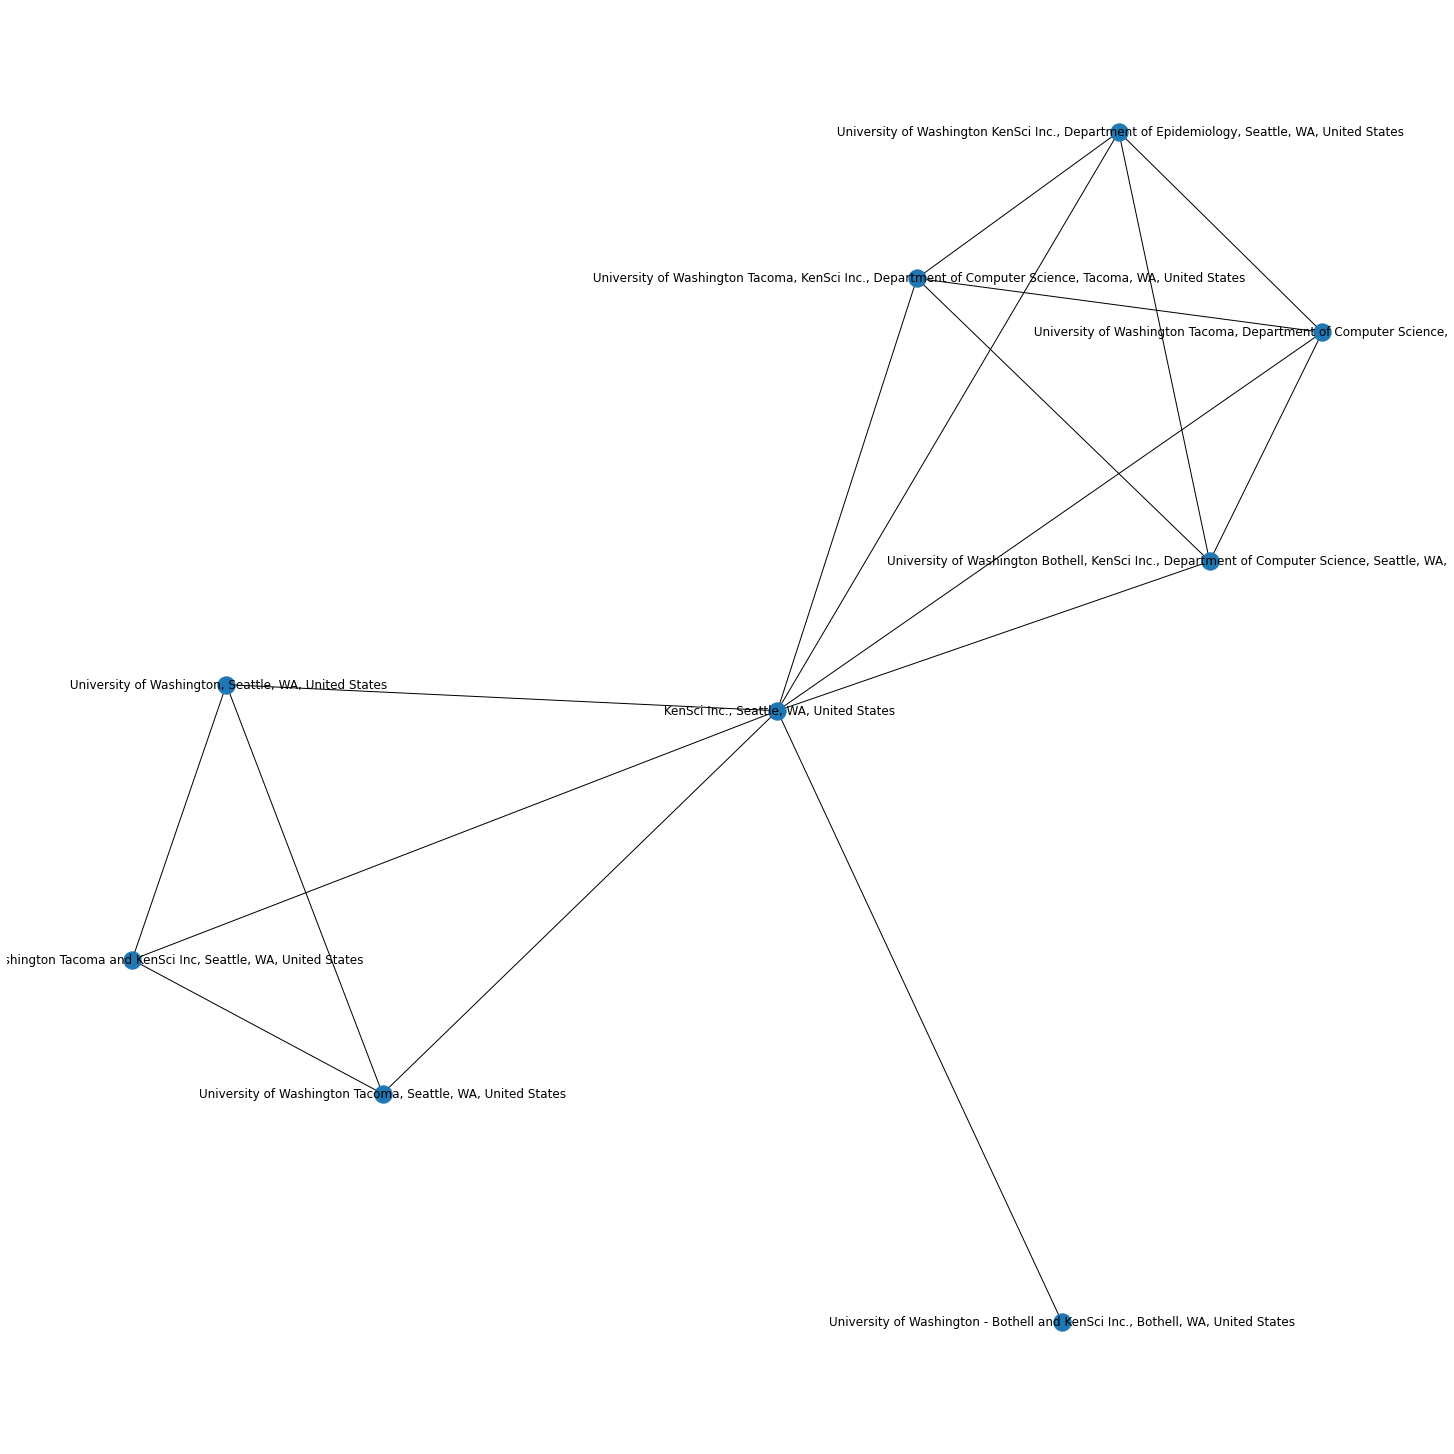

In [46]:
plt.figure(figsize = (20, 20))
nx.draw(KenSci_Inc_Seattle_cliques, with_labels=True)

In [47]:
# export graph for import to Gephi
nx.write_gexf(KenSci_Inc_Seattle_cliques, 'scopus2_cliques_2.gexf', encoding='utf-8', prettyprint=True, version='1.2draft')

## Look at the network across the years

In [48]:
data.groupby('Year').size().sort_values(ascending=False)

Year
2021    55
2020    33
2022    29
2019    19
2018     4
2008     1
2015     1
2017     1
2023     1
dtype: int64

In [49]:
# break analysis down by year
data_2018 = data[data['Year'] == 2018]
data_2019 = data[data['Year'] == 2019]
data_2020 = data[data['Year'] == 2020]
data_2021 = data[data['Year'] == 2021]
data_2022 = data[data['Year'] == 2022]

In [50]:
years = [data_2018, data_2019, data_2020, data_2021, data_2022]
for yr in years:
    print(yr.shape)

(4, 30)
(19, 30)
(33, 30)
(55, 30)
(29, 30)


In [51]:
# preprocess with same steps as above

# create pairs

#------------------
paired_2018 = (data_2018.set_index('Title')['Affiliations']
   .str.split(',')
   .map(partial(combinations, r=2))
   .map(list)
   .explode()
   .reset_index())

df_2018 = paired_2018.groupby('Affiliations').size().to_frame(name = 'count').reset_index()
new_col_list = ['aff_0','aff_1']
for n,col in enumerate(new_col_list):
    df_2018[col] = df_2018['Affiliations'].apply(lambda location: location[n])
    
#------------------
paired_2019 = (data_2019.set_index('Title')['Affiliations']
   .str.split(',')
   .map(partial(combinations, r=2))
   .map(list)
   .explode()
   .reset_index())

df_2019 = paired_2019.groupby('Affiliations').size().to_frame(name = 'count').reset_index()
new_col_list = ['aff_0','aff_1']
for n,col in enumerate(new_col_list):
    df_2019[col] = df_2019['Affiliations'].apply(lambda location: location[n])

#-----------------
paired_2020 = (data_2020.set_index('Title')['Affiliations']
   .str.split(',')
   .map(partial(combinations, r=2))
   .map(list)
   .explode()
   .reset_index())

df_2020 = paired_2020.groupby('Affiliations').size().to_frame(name = 'count').reset_index()
new_col_list = ['aff_0','aff_1']
for n,col in enumerate(new_col_list):
    df_2020[col] = df_2020['Affiliations'].apply(lambda location: location[n])

    
#-----------------
paired_2021 = (data_2021.set_index('Title')['Affiliations']
   .str.split(',')
   .map(partial(combinations, r=2))
   .map(list)
   .explode()
   .reset_index())

df_2021 = paired_2021.groupby('Affiliations').size().to_frame(name = 'count').reset_index()
new_col_list = ['aff_0','aff_1']
for n,col in enumerate(new_col_list):
    df_2021[col] = df_2021['Affiliations'].apply(lambda location: location[n])
    
#-----------------
paired_2022 = (data_2022.set_index('Title')['Affiliations']
   .str.split(',')
   .map(partial(combinations, r=2))
   .map(list)
   .explode()
   .reset_index())

df_2022 = paired_2022.groupby('Affiliations').size().to_frame(name = 'count').reset_index()
new_col_list = ['aff_0','aff_1']
for n,col in enumerate(new_col_list):
    df_2022[col] = df_2022['Affiliations'].apply(lambda location: location[n])

In [52]:
years = [df_2018, df_2019, df_2020, df_2021, df_2022]
for yr in years:
    print(yr.shape)

(419, 4)
(753, 4)
(3204, 4)
(5842, 4)
(4904, 4)


In [53]:
# remove self pairs in any of the dfs
df_2018 = df_2018[df_2018['aff_0'] != df_2018['aff_1']]
df_2019 = df_2019[df_2019['aff_0'] != df_2019['aff_1']]
df_2020 = df_2020[df_2020['aff_0'] != df_2020['aff_1']]
df_2021 = df_2021[df_2021['aff_0'] != df_2021['aff_1']]
df_2022 = df_2022[df_2022['aff_0'] != df_2022['aff_1']]


In [54]:
for yr in years:
    print(yr.shape)

(419, 4)
(753, 4)
(3204, 4)
(5842, 4)
(4904, 4)


In [55]:
# create graphs
G_2018 = nx.from_pandas_edgelist(df_2018, 'aff_0', 'aff_1')
G_2019 = nx.from_pandas_edgelist(df_2019, 'aff_0', 'aff_1')
G_2020 = nx.from_pandas_edgelist(df_2020, 'aff_0', 'aff_1')
G_2021 = nx.from_pandas_edgelist(df_2021, 'aff_0', 'aff_1')
G_2022 = nx.from_pandas_edgelist(df_2022, 'aff_0', 'aff_1')




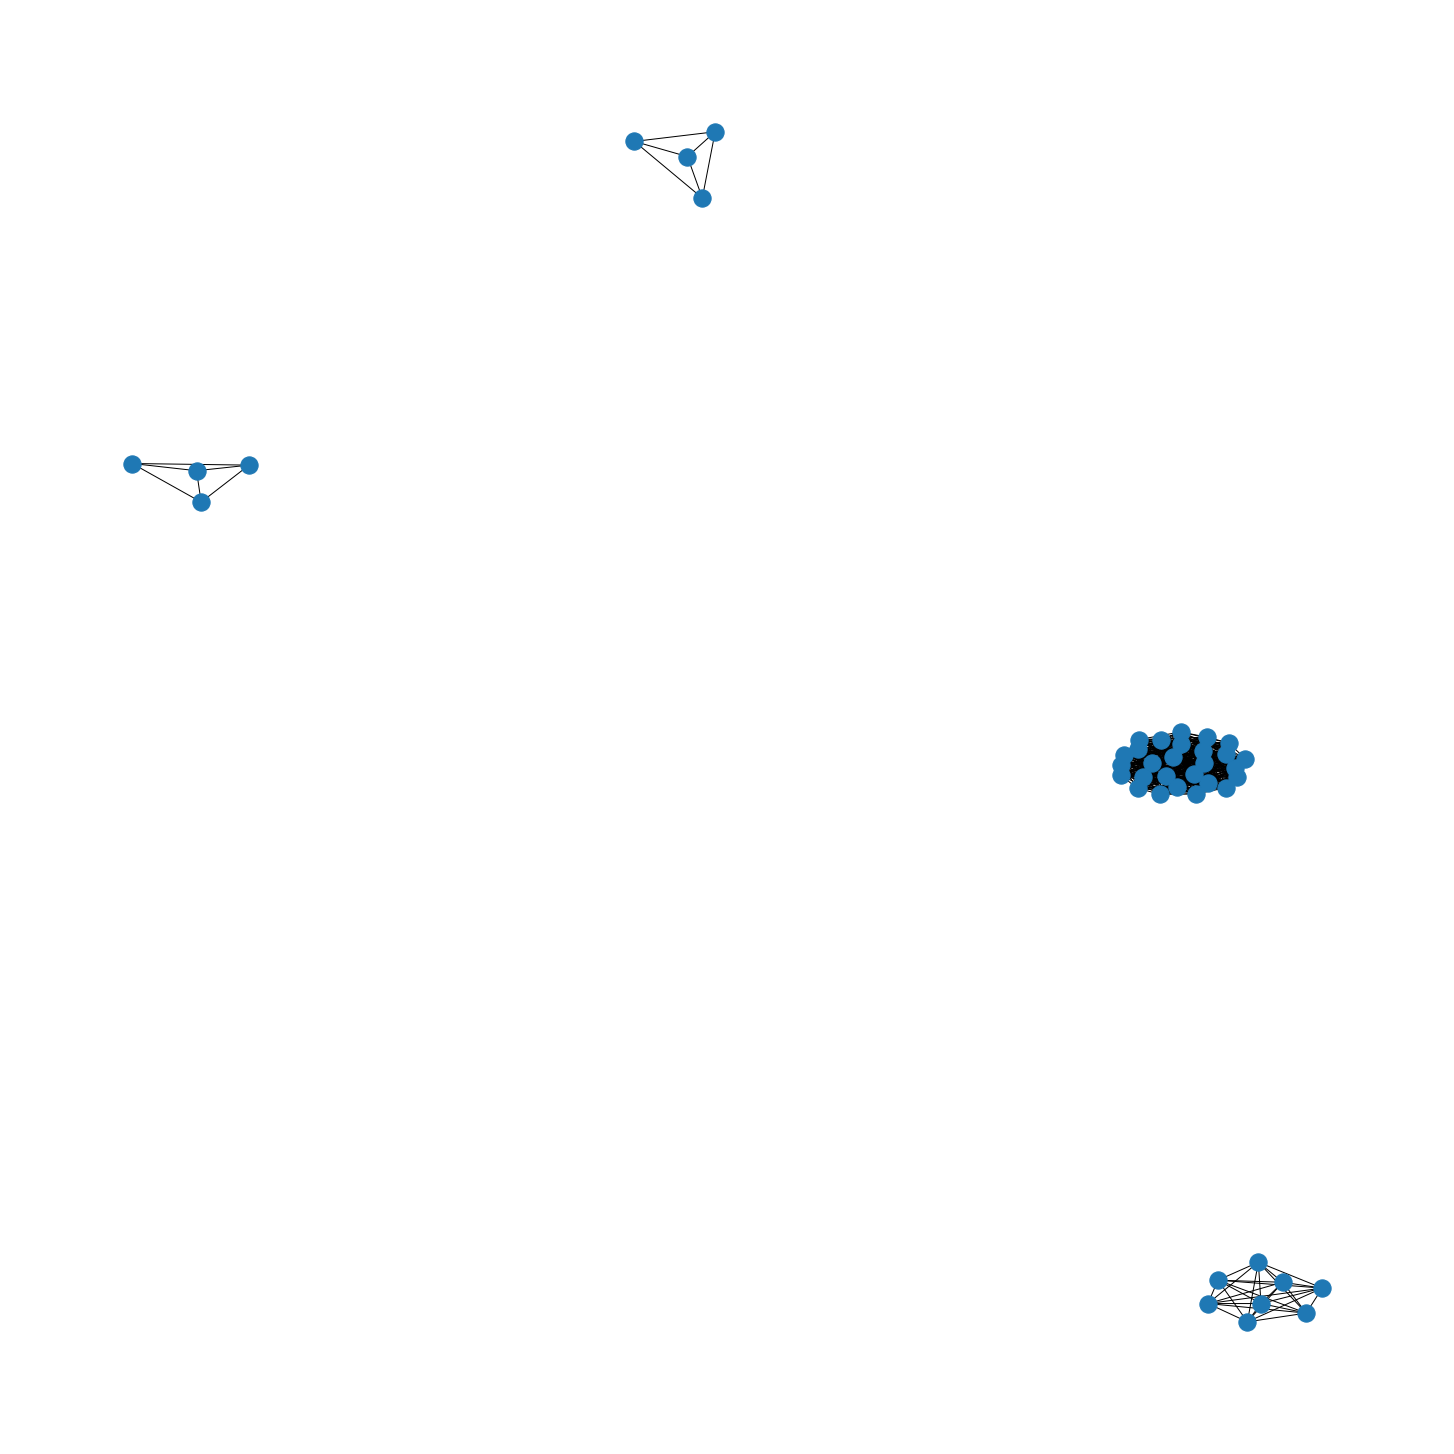

In [56]:
plt.figure(figsize = (20, 20))
nx.draw(G_2018)

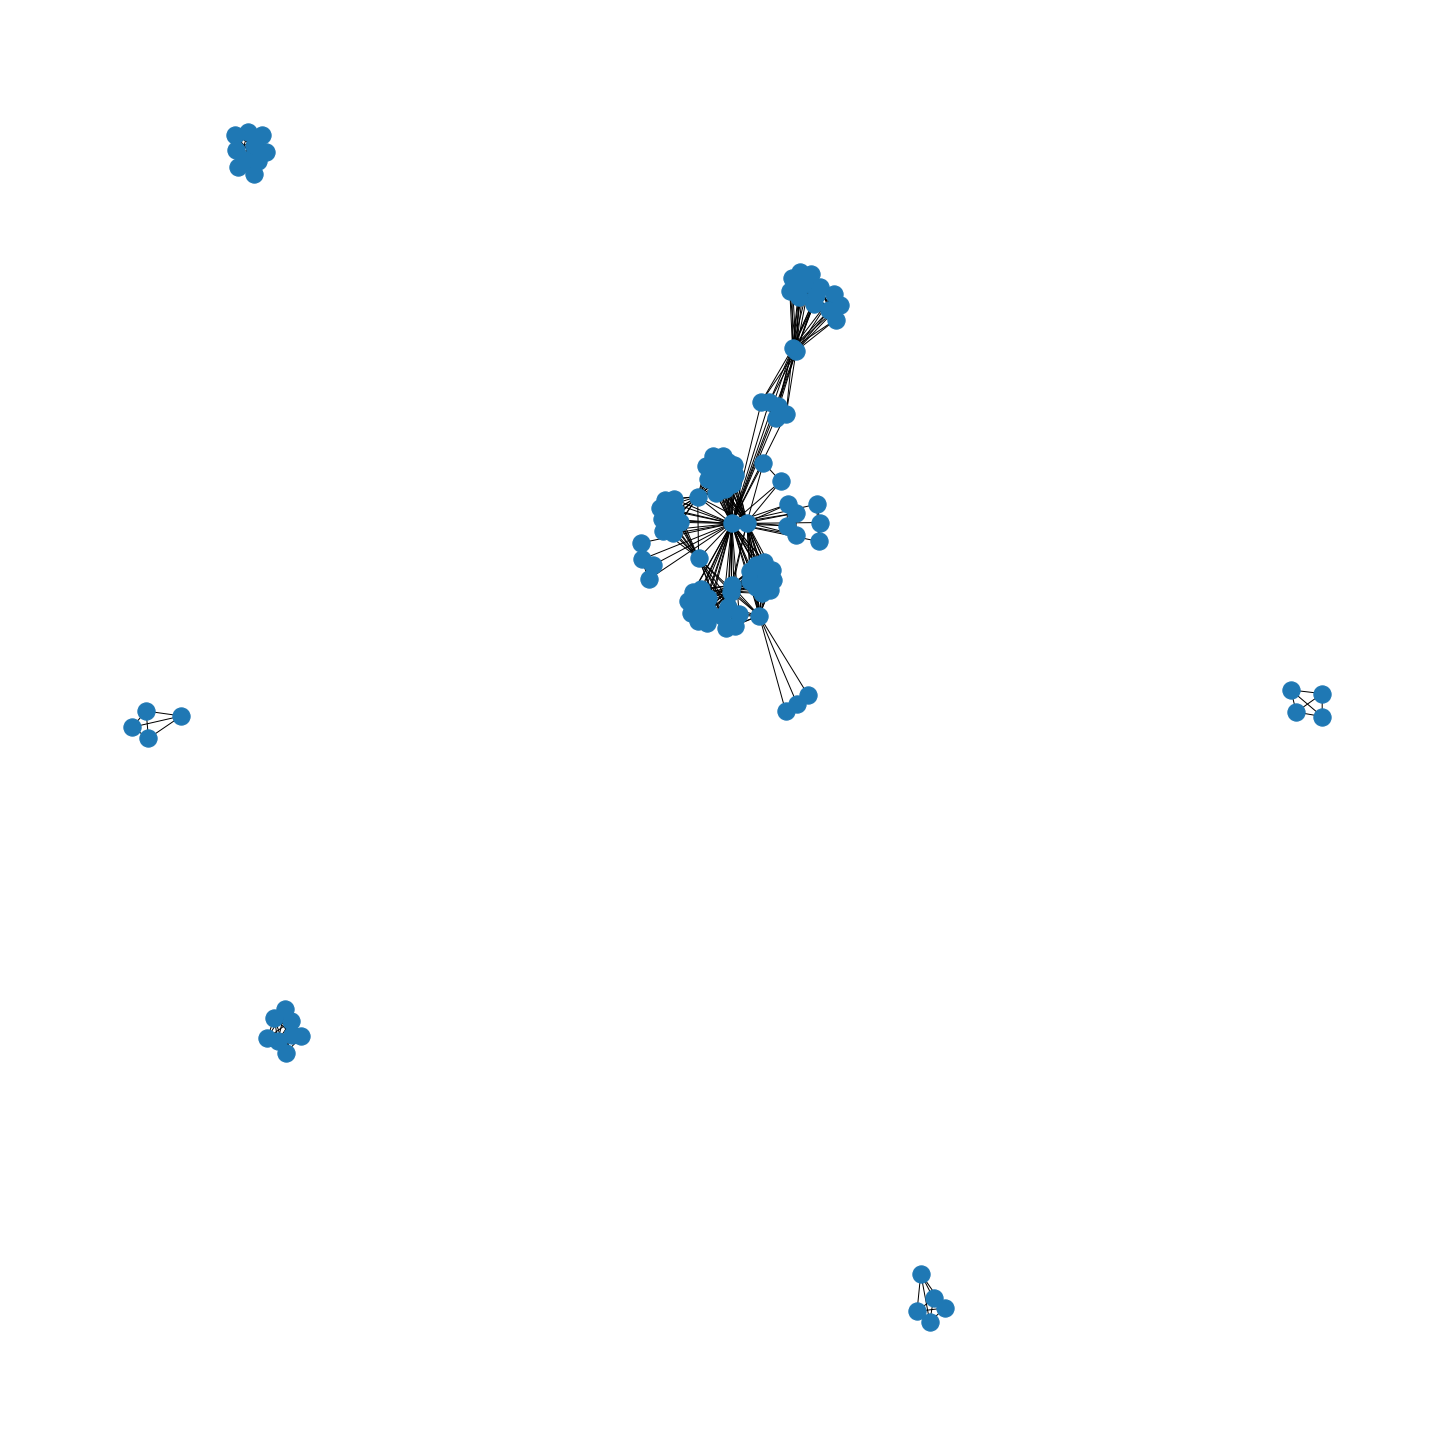

In [57]:
plt.figure(figsize = (20, 20))
nx.draw(G_2019)

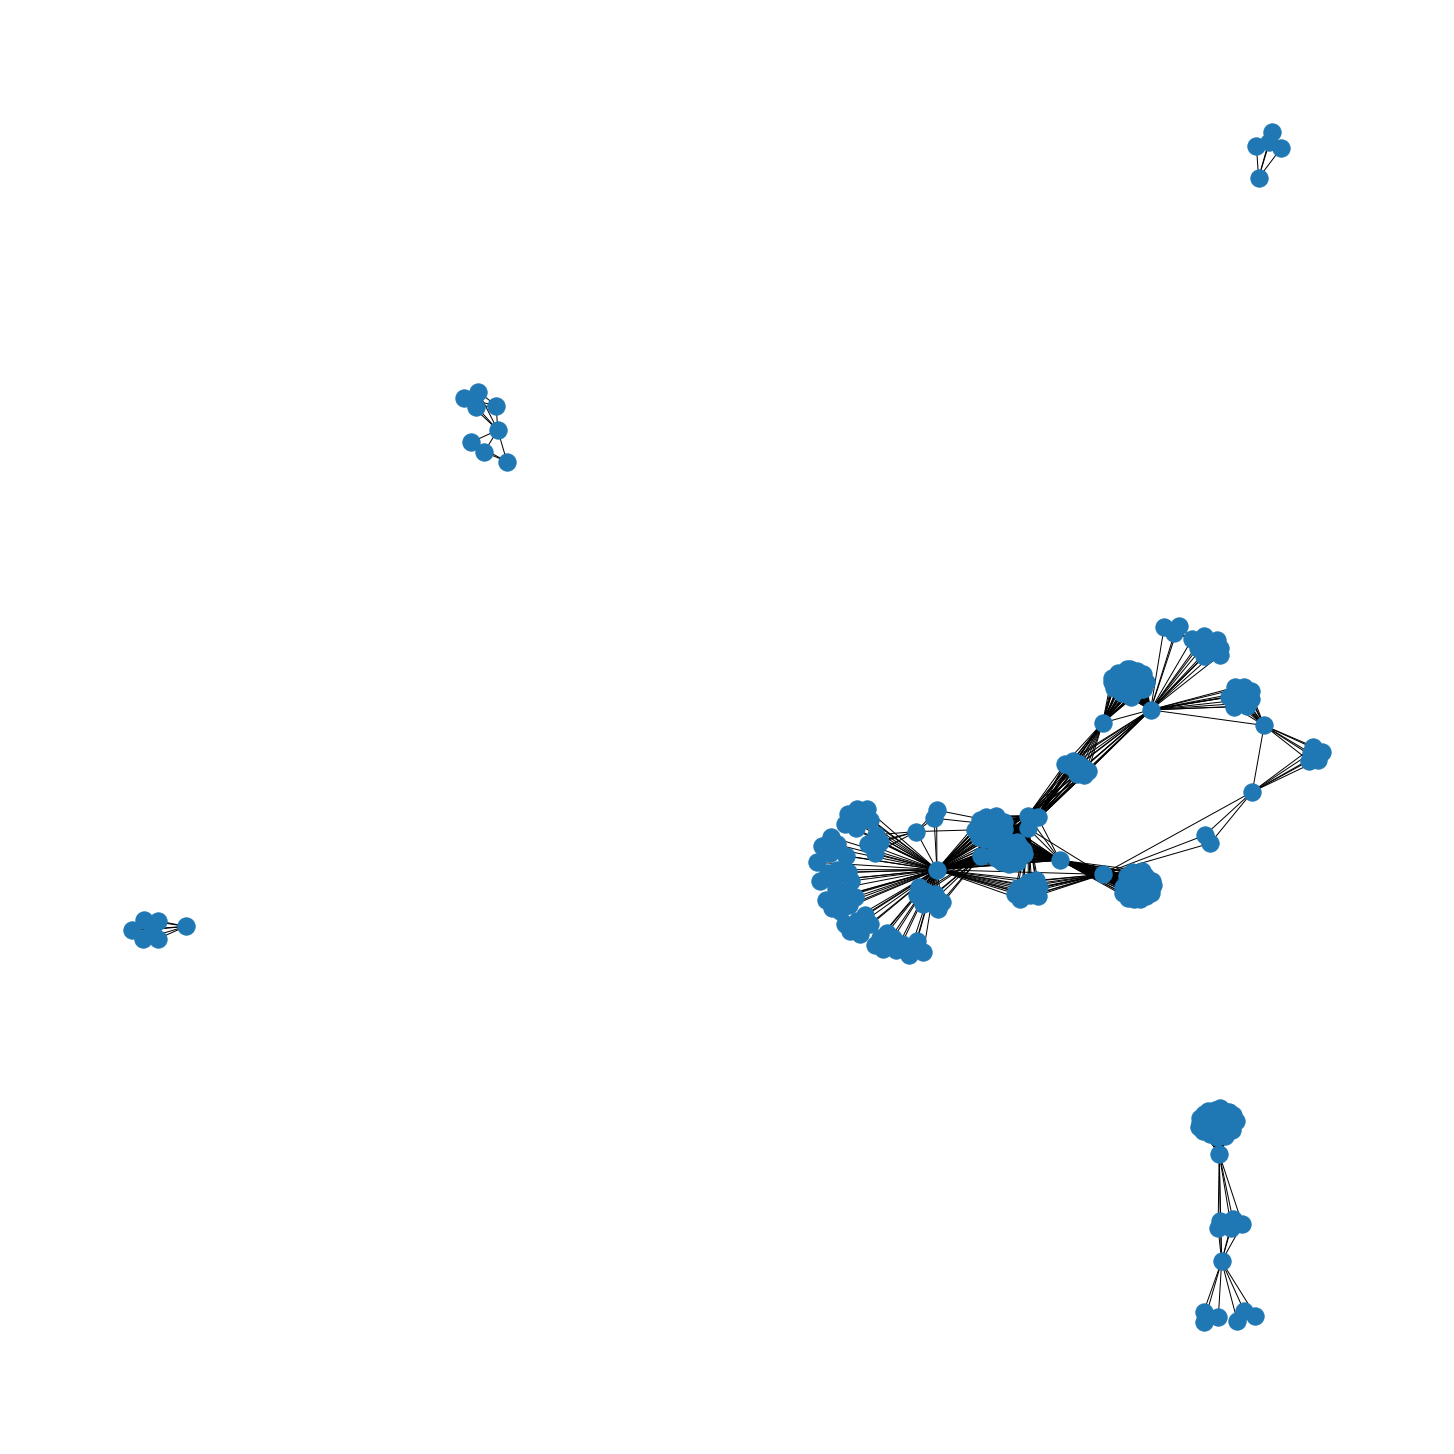

In [58]:
plt.figure(figsize = (20, 20))
nx.draw(G_2020)

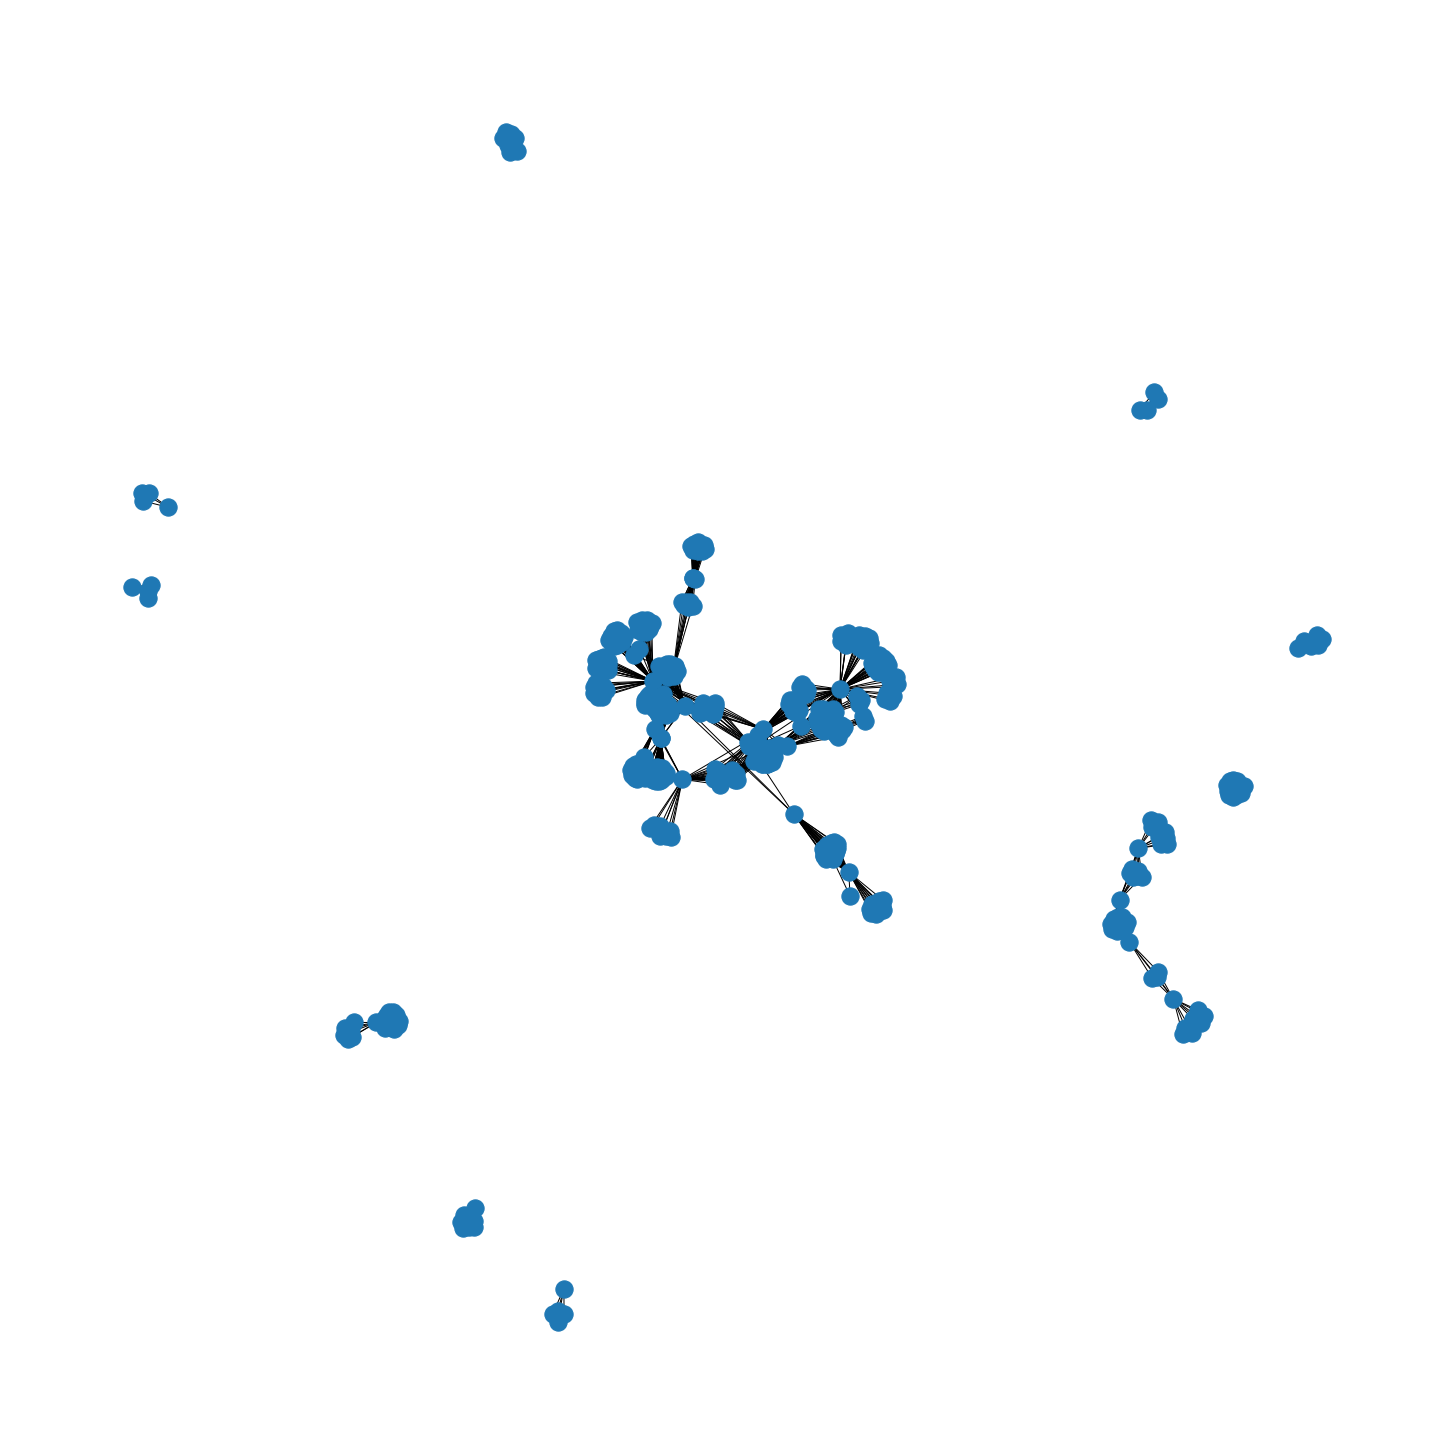

In [59]:
plt.figure(figsize = (20, 20))
nx.draw(G_2021)

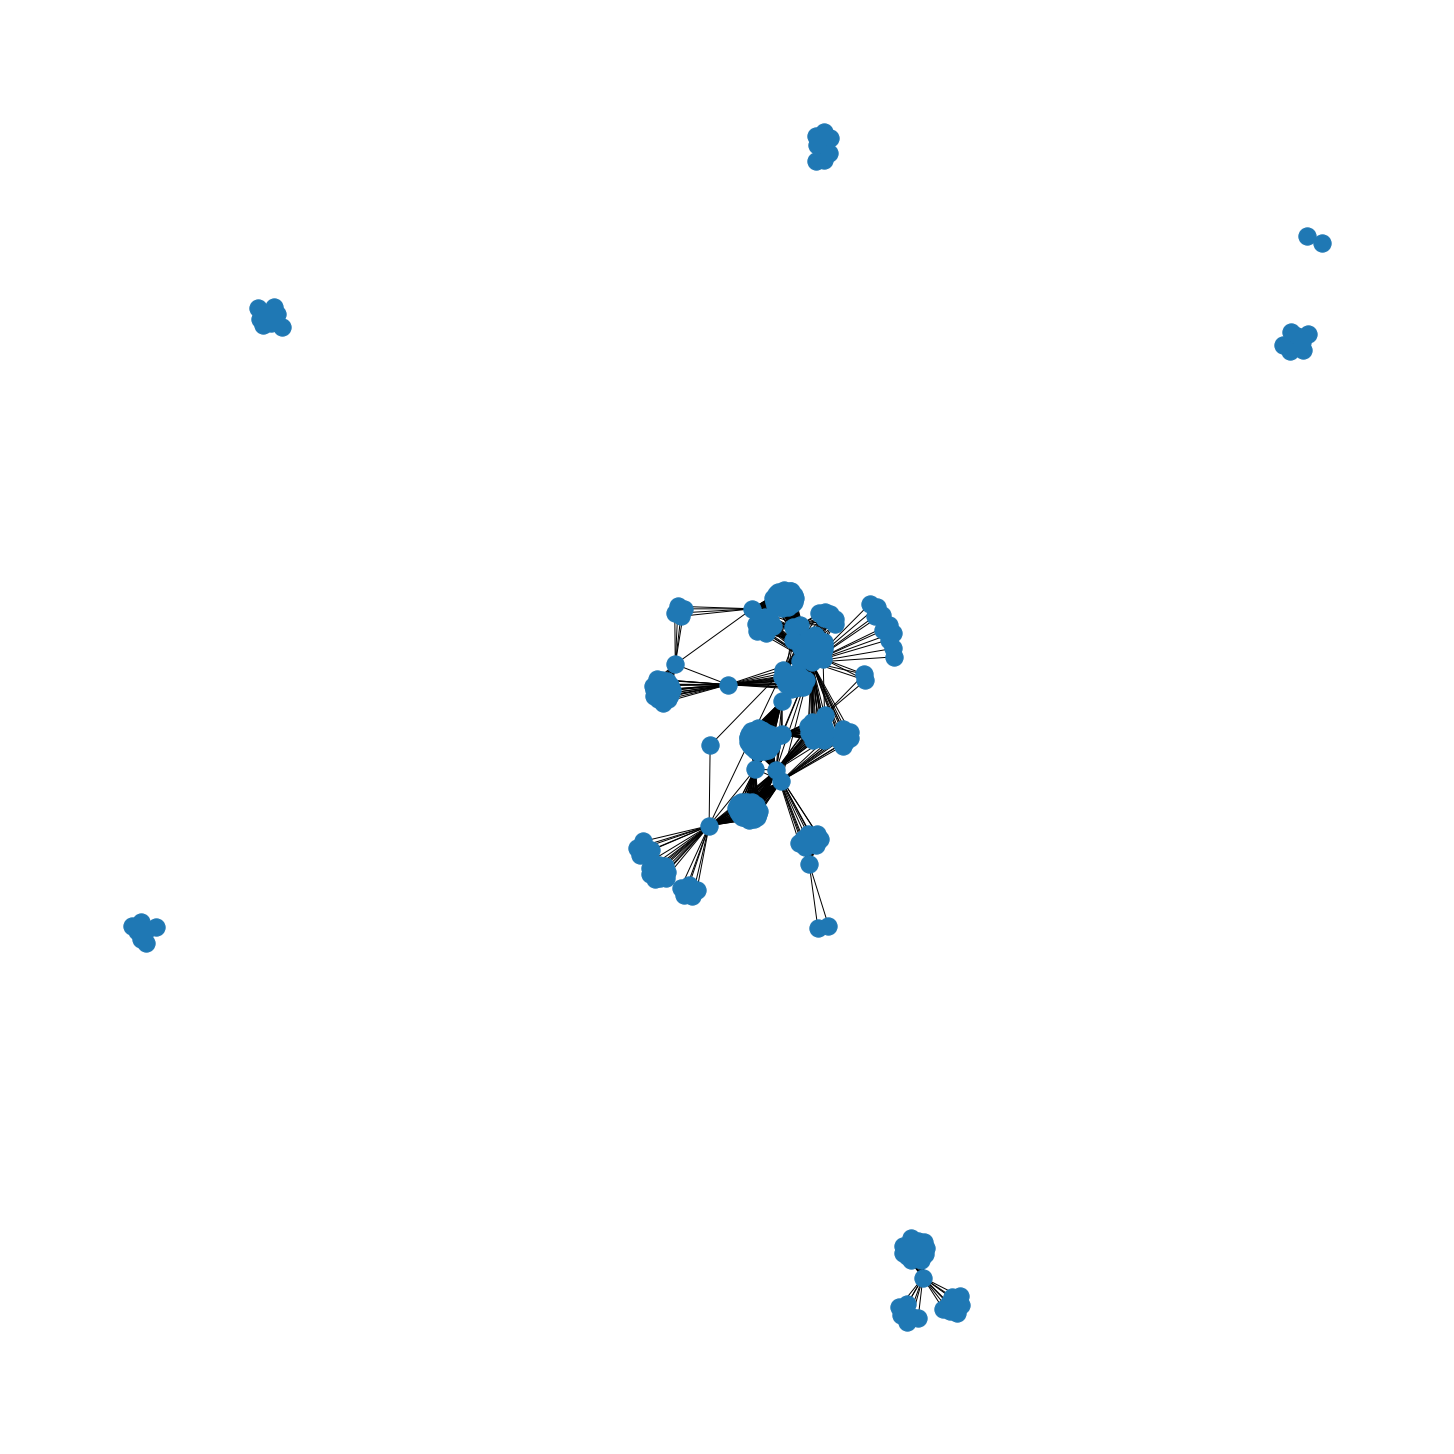

In [60]:
plt.figure(figsize = (20, 20))
nx.draw(G_2022)

In [61]:
graphs = [G_2018, G_2019, G_2020, G_2021, G_2022]
for graph in graphs:
    print('Number of components in {}: {}'.format(graph, nx.number_connected_components(graph)))

Number of components in Graph with 43 nodes and 391 edges: 4
Number of components in Graph with 122 nodes and 659 edges: 6
Number of components in Graph with 290 nodes and 2971 edges: 5
Number of components in Graph with 508 nodes and 5361 edges: 11
Number of components in Graph with 339 nodes and 4507 edges: 7


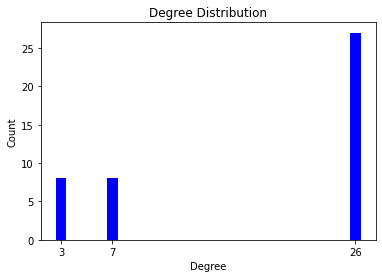

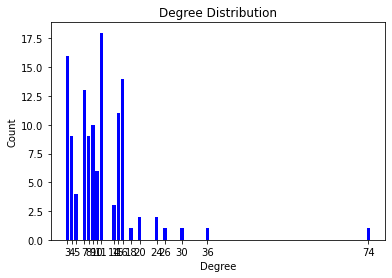

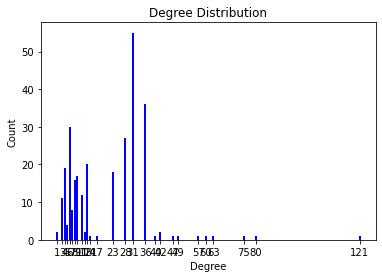

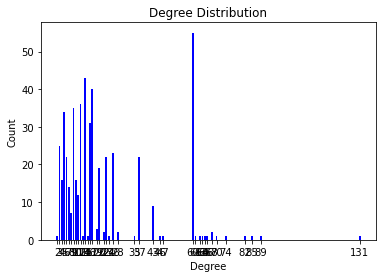

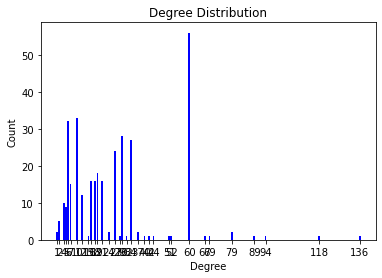

In [62]:
for g in graphs:
    degree_sequence = sorted([d for n, d in g.degree()], reverse=True)
    degreeCount = Counter(degree_sequence)
    deg, cnt = zip(*degreeCount.items())
    plt.bar(deg, cnt, width=0.80, color='b')
    plt.title("Degree Distribution")
    plt.ylabel("Count")
    plt.xticks(deg)

    plt.xlabel("Degree")
    plt.show()